In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Introduction
##The Dataset

The dataset used for this project was obtained from Kaggle's Drug Consumption Classification. This dataset contains records for 1885 respondents, each with 12 attributes.

In [14]:
pd.options.display.max_columns = 32

df = pd.read_csv('drug_consumption.csv')
df.head(10)

,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Alcohol,Amphet,Amyl,Benzos,Caff,Cannabis,Choc,Coke,Crack,Ecstasy,Heroin,Ketamine,Legalh,LSD,Meth,Mushrooms,Nicotine,Semer,VSA
0,1,0.49788,0.48246,-0.05921,0.96082,0.12600,0.31287,-0.57545,-0.58331,-0.91699,-0.00665,-0.21712,-1.18084,CL5,CL2,CL0,CL2,CL6,CL0,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL2,CL0,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,-0.67825,1.93886,1.43533,0.76096,-0.14277,-0.71126,-0.21575,CL5,CL2,CL2,CL0,CL6,CL4,CL6,CL3,CL0,CL4,CL0,CL2,CL0,CL2,CL3,CL0,CL4,CL0,CL0
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,-0.46725,0.80523,-0.84732,-1.62090,-1.01450,-1.37983,0.40148,CL6,CL0,CL0,CL0,CL6,CL3,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL1,CL0,CL0,CL0
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,-0.14882,-0.80615,-0.01928,0.59042,0.58489,-1.37983,-1.18084,CL4,CL0,CL0,CL3,CL5,CL2,CL4,CL2,CL0,CL0,CL0,CL2,CL0,CL0,CL0,CL0,CL2,CL0,CL0
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0.73545,-1.63340,-0.45174,-0.30172,1.30612,-0.21712,-0.21575,CL4,CL1,CL1,CL0,CL6,CL3,CL6,CL0,CL0,CL1,CL0,CL0,CL1,CL0,CL0,CL2,CL2,CL0,CL0
5,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,-0.67825,-0.30033,-1.55521,2.03972,1.63088,-1.37983,-1.54858,CL2,CL0,CL0,CL0,CL6,CL0,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
6,7,1.09449,-0.48246,1.16365,-0.57009,-0.31685,-0.46725,-1.09207,-0.45174,-0.30172,0.93949,-0.21712,0.07987,CL6,CL0,CL0,CL0,CL6,CL1,CL5,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
7,8,0.49788,-0.48246,-1.73790,0.96082,-0.31685,-1.32828,1.93886,-0.84732,-0.30172,1.63088,0.19268,-0.52593,CL5,CL0,CL0,CL0,CL6,CL0,CL4,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0
8,9,0.49788,0.48246,-0.05921,0.24923,-0.31685,0.62967,2.57309,-0.97631,0.76096,1.13407,-1.37983,-1.54858,CL4,CL0,CL0,CL0,CL6,CL0,CL6,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0
9,10,1.82213,-0.48246,1.16365,0.96082,-0.31685,-0.24649,0.00332,-1.42424,0.59042,0.12331,-1.37983,-0.84637,CL6,CL1,CL0,CL1,CL6,CL1,CL6,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL0,CL6,CL0,CL0


#Preprocessing data

The original dataset doesn´t have any duplicated entry. We remove all drugs except cannabis from the entries and convert the results to more understandable values.

In [15]:
n_rows = df.shape[0]
df = df.drop_duplicates()
n_rows_dup = df.shape[0]

print("Original Dataset: ", n_rows)
print("Dropped ", n_rows - n_rows_dup)

drug_col = ['Alcohol', 'Amphet', 'Amyl', 'Benzos', 'Caff', 'Choc', 'Coke', 'Crack', 'Ecstasy', 'Heroin', 'Ketamine', 'Legalh', 'LSD', 'Meth', 'Mushrooms', 'Nicotine', 'Semer', 'VSA']
df = df.drop(columns=drug_col) #Remove all drugs except cannabis

# Ensure string type
df["Age"] = df["Age"].astype(str)
df["Gender"] = df["Gender"].astype(str)
df["Education"] = df["Education"].astype(str)
df["Country"] = df["Country"].astype(str)
df["Ethnicity"] = df["Ethnicity"].astype(str)

#List of nscore values
nscore_values = [-3.46436, -3.15735, -2.75696, -2.52197, -2.42317, -2.34360, -2.21844, -2.05048, -1.86962, -1.69163, -1.55078, -1.43907, -1.32828, -1.19430, -1.05308, -0.92104, -0.79151, -0.67825, -0.58016, -0.46725, -0.34799, -0.24649, -0.14882, -0.05188, 0.04257, 0.13606, 0.22393, 0.31287, 0.41667, 0.52135, 0.62967, 0.73545, 0.82562, 0.91093, 1.02119, 1.13281, 1.23461, 1.37297, 1.49158, 1.60383, 1.72012, 1.83990, 1.98437, 2.12700, 2.28554, 2.46262, 2.61139, 2.82196, 3.27393]

#List of escore values
escore_values = [-3.27393, -3.00537, -3.00537, -2.72827, -2.53830, -2.44904, -2.32338, -2.21069, -2.11437, -2.03972, -1.92173, -1.76250, -1.63340, -1.50796, -1.37639, -1.23177, -1.09207, -0.94779, -0.80615, -0.69509, -0.57545, -0.43999, -0.30033, -0.15487, 0.00332, 0.16767, 0.32197, 0.47617, 0.63779, 0.80523, 0.96248, 1.11406, 1.28610, 1.45421, 1.58487, 1.74091, 1.93886, 2.12700, 2.32338, 2.57309, 2.85950, 2.85950, 3.00537, 3.27393]

#Tuple of oscore and values
oscore_values = [(24, -3.27393), (38, -1.11902), (50, 0.58331), (26, -2.85950), (39, -0.97631), (51, 0.72330), (28, -2.63199), (40, -0.84732), (52, 0.88309), (29, -2.39883), (41, -0.71727), (53, 1.06238), (30, -2.21069), (42, -0.58331), (54, 1.24033), (31, -2.09015), (43, -0.45174), (55, 1.43533), (32, -1.97495), (44, -0.31776), (56, 1.65653), (33, -1.82919), (45, -0.17779), (57, 1.88511), (34, -1.68062), (46, -0.01928), (58, 1.15324), (35, -1.55521), (47, 0.14143), (59, 2.44904), (36, -1.42424), (48, 0.29338), (60, 2.90161), (37, -1.27553), (49, 0.44585)]

#Tuple of ascore and values
ascore_values = [(12, -3.46436), (34, -1.34289), (48, 0.76096), (16, -3.15735), (35, -1.21213), (49, 0.94156), (18, -3.00537), (36, -1.07533), (50, 1.11406), (23, -2.90161), (37, -0.91699), (51, 1.2861), (24, -2.78793), (38, -0.76096), (52, 1.45039), (25, -2.70172), (39, -0.60633), (53, 1.61108), (26, -2.53830), (40, -0.45321), (54, 1.81866), (27, -2.35413), (41, -0.30172), (55, 2.03972), (28, -2.21844), (42, -0.15487), (56, 2.23427), (29, -2.07848), (43, -0.01729), (57, 2.46262), (30, -1.92595), (44, 0.13136), (58, 2.75696), (31, -1.77200), (45, 0.28783), (59, 3.15735), (32, -1.62090), (46, 0.43852), (60, 3.46436), (33, -1.47955), (47, 0.59042)]

#Tuple of cscore and values
cscore_values = [(17, -3.46436), (32, -1.25773), (46, 0.58489), (19, -3.15735), (33, -1.13788), (47, 0.7583), (20, -2.90161), (34, -1.01450), (48, 0.93949), (21, -2.72827), (35, -0.89891), (49, 1.13407), (22, -2.57309), (36, -0.78155), (50, 1.30612), (23, -2.42317), (37, -0.65253), (51, 1.46191), (24, -2.30408), (38, -0.52745), (52, 1.63088), (25, -2.18109), (39, -0.40581), (53, 1.81175), (26, -2.04506), (40, -0.27607), (54, 2.04506), (27, -1.92173), (41, -0.14277), (55, 2.33337), (28, -1.78169), (42, -0.00665), (56, 2.63199), (29, -1.64101), (43, 0.12331), (57, 3.00537), (30, -1.51840), (44, 0.25953), (59, 3.46436), (31, -1.38502), (45, 0.41594)]

#List of impulsive values
impulsive_values = [-2.55524, -1.37983, -0.71126, -0.21712, 0.19268, 0.52975, 0.88113, 1.29221, 1.86203, 2.90161]

#List of SS values
ss_values = [-2.07848, -1.54858, -1.18084, -0.84637, -0.52593, -0.21575, 0.07987, 0.40148, 0.76540, 1.22470, 1.92173]



df["Nscore"] = df["Nscore"].astype(int)
df["Escore"] = df["Escore"].astype(int)
df["Oscore"] = df["Oscore"].astype(int)
df["Ascore"] = df["Ascore"].astype(int)
df["Cscore"] = df["Cscore"].astype(int)
df["Impulsive"] = df["Impulsive"].astype(int)
df["SS"] = df["SS"].astype(int)

df.head(10)


Original Dataset:  1885
Dropped  0


,ID,Age,Gender,Education,Country,Ethnicity,Nscore,Escore,Oscore,Ascore,Cscore,Impulsive,SS,Cannabis
0,1,0.49788,0.48246,-0.05921,0.96082,0.126,0,0,0,0,0,0,-1,CL0
1,2,-0.07854,-0.48246,1.98437,0.96082,-0.31685,0,1,1,0,0,0,0,CL4
2,3,0.49788,-0.48246,-0.05921,0.96082,-0.31685,0,0,0,-1,-1,-1,0,CL3
3,4,-0.95197,0.48246,1.16365,0.96082,-0.31685,0,0,0,0,0,-1,-1,CL2
4,5,0.49788,0.48246,1.98437,0.96082,-0.31685,0,-1,0,0,1,0,0,CL3
5,6,2.59171,0.48246,-1.22751,0.24923,-0.31685,0,0,-1,2,1,-1,-1,CL0
6,7,1.09449,-0.48246,1.16365,-0.57009,-0.31685,0,-1,0,0,0,0,0,CL1
7,8,0.49788,-0.48246,-1.7379,0.96082,-0.31685,-1,1,0,0,1,0,0,CL0
8,9,0.49788,0.48246,-0.05921,0.24923,-0.31685,0,2,0,0,1,-1,-1,CL0
9,10,1.82213,-0.48246,1.16365,0.96082,-0.31685,0,0,-1,0,0,-1,0,CL1


#Cannabis Consumption

| Value |      Description      |
|-------|-----------------------|
|CL0	| Never Used            |
|CL1	|Used over a Decade Ago |
|CL2	| Used in Last Decade   |
|CL3	| Used in Last Year     |
|CL4	| Used in Last Month    |
|CL5	| Used in Last Week     |
|CL6	| Used in Last Day      |

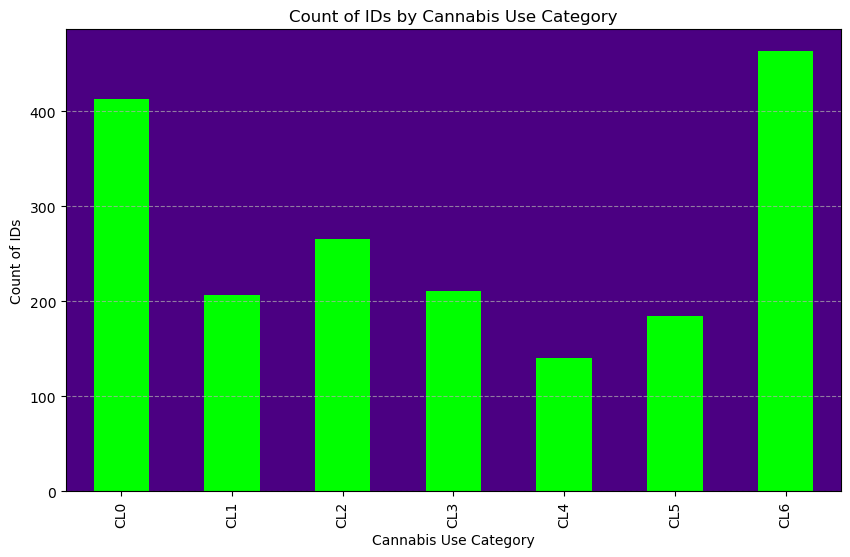

In [16]:
# Group the data by the "Cannabis" column and count the number of IDs in each group
cannabis_counts = df['Cannabis'].value_counts().sort_index()

# Plot a bar chart
plt.figure(figsize=(10, 6))
cannabis_counts.plot(kind='bar', color='#00ff00')
plt.title('Count of IDs by Cannabis Use Category')
plt.xlabel('Cannabis Use Category')
plt.ylabel('Count of IDs')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add shaded background
plt.gca().patch.set_facecolor('#4B0082')  # Set background color to a shade of dark purple

plt.show()

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Define inputs and target
X = df.drop(columns=['Cannabis'])
y = df['Cannabis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)


print("Training set size: ", len(X_train))
print("Test set size: ", len(X_test))

# Train a Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)



Training set size:  1508
Test set size:  377
Accuracy:  0.2864721485411141
